In [1]:
### Network Slicing Recognition

The telecom industry is going through a massive digital transformation with the adoption of ML, AI, feedback-based automation and advanced analytics to handle the next generation applications and services. AI concepts are not new; the algorithms used by Machine Learning and Deep Learning are being currently implemented in various industries and technology verticals. With growing data and immense volume <br>

of information over 5G, the ability to predict data proactively, swiftly and with accuracy, is critically important. Data-driven decision making will be vital in future communication networks due to the traffic explosion and Artificial Intelligence (AI) will accelerate the 5G network performance. <br>

Mobile operators are looking for a programmable solution that will allow them to accommodate multiple independent tenants on the same physical infrastructure and 5G networks allow for end-to-end network resource allocation using the concept of Network Slicing (NS). <br>

Network Slicing will play a vital role in enabling a multitude of 5G applications, use cases, and services. Network slicing functions will provide an end-to-end isolation between slices with an ability to customize each slice based on the service demands (bandwidth, coverage, security, latency, reliability, etc). <br>

Your Task is to build a Machine Learning model that will be able to to proactively detect and eliminate threats based on incoming connections thereby selecting the most appropriate network slice, even in case of a network failure. <br>

**LTE/5g** - User Equipment categories or classes to define the performance specifications <br>
**Packet Loss Rate** - number of packets not received divided by the total number of packets sent. <br>
**Packet Delay** - The time for a packet to be received. <br>
**Slice type** - network configuration that allows multiple networks (virtualized and independent) <br>
**GBR** - Guaranteed Bit Rate <br>
**Healthcare** - Usage in Healthcare (1 or 0) <br>
**Industry 4.0** - Usage in Digital Enterprises(1 or 0) <br>
**IoT Devices** - Usage <br>
**Public Safety** - Usage for public welfare and safety purposes (1 or 0) <br>
**Smart City & Home** - usage in daily household chores <br>
**Smart Transportation** - usage in public transportation <br>
**Smartphone** - whether used for smartphone cellular data <br>

In [2]:
####! pip install neattext

In [3]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import seaborn as sn

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [4]:
##! pip uninstall numpy
###!pip install numpy==1.20

In [5]:
###!mkdir ~/.kaggle

In [6]:
###!cp /kaggle.json ~/.kaggle/

In [7]:
###!chmod 600 ~/.kaggle/kaggle.json

In [8]:
###! pip install kaggle
###!pip install keras-tuner

In [9]:
###!kaggle datasets download -d gauravduttakiit/network-slicing-recognition

In [10]:
###!unzip /content/network-slicing-recognition.zip

In [11]:
train_dataset = pd.read_csv("/content/train_dataset.csv")
test_dataset = pd.read_csv("/content/test_dataset.csv")

In [12]:
print(train_dataset.shape, test_dataset.shape)

(31583, 17) (31584, 16)


In [13]:
test_dataset['slice Type'] = 0

In [14]:
train_dataset = train_dataset.reset_index()
test_dataset = test_dataset.reset_index()
train_dataset.rename(columns = { "index" : "ID"}, inplace = True)
test_dataset.rename(columns = { "index" : "ID"}, inplace = True)

In [15]:
train_dataset['slice Type'].value_counts()

1    16799
3     7392
2     7392
Name: slice Type, dtype: int64

In [16]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

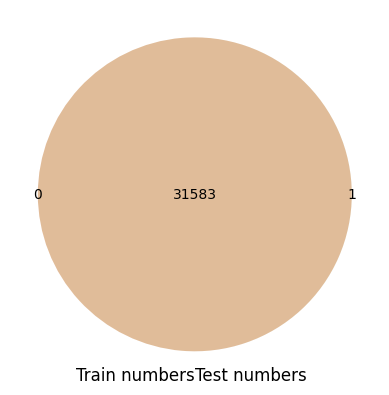

In [17]:
set_numbers_train = set(train_dataset[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
set_numbers_test = set(test_dataset[['ID']].drop_duplicates().sort_values(by = 'ID')['ID'].tolist())
venn2((set_numbers_train, set_numbers_test), set_labels = ('Train numbers', 'Test numbers'))

In [18]:
train_dataset.columns

Index(['ID', 'LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay',
       'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')

In [19]:
###! pip install klib

In [20]:
###!pip install keras-tuner

In [21]:
import klib

In [22]:
train_dataset = klib.clean_column_names(train_dataset)
test_dataset = klib.clean_column_names(test_dataset)

In [23]:
train_dataset = klib.convert_datatypes(train_dataset)
test_dataset = klib.convert_datatypes(test_dataset)

In [24]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

### Anomaly Detection Using One-Class SVM


In [25]:
from sklearn import svm

In [26]:
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(train_dataset)

OneClassSVM(gamma=0.1, nu=0.05)

In [27]:
pred = clf.predict(train_dataset)

# inliers are labeled 1, outliers are labeled -1
normal = train_dataset[pred == 1]
abnormal = train_dataset[pred == -1]

In [28]:
print(normal.shape, abnormal.shape)

(18373, 18) (13210, 18)


In [29]:
normal.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [30]:
normal['slice_type'].value_counts()

1    9839
2    4294
3    4240
Name: slice_type, dtype: int64

In [31]:
train_dataset = normal

In [32]:
print(train_dataset.shape)
print(train_dataset.columns)

(18373, 18)
Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')


In [33]:
test_dataset['slice_type'] = 0

In [34]:
klib.cat_plot(train_dataset)

No columns with categorical data were detected.


In [35]:
klib.corr_interactive_plot(train_dataset)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='id', ylabel='Density'>

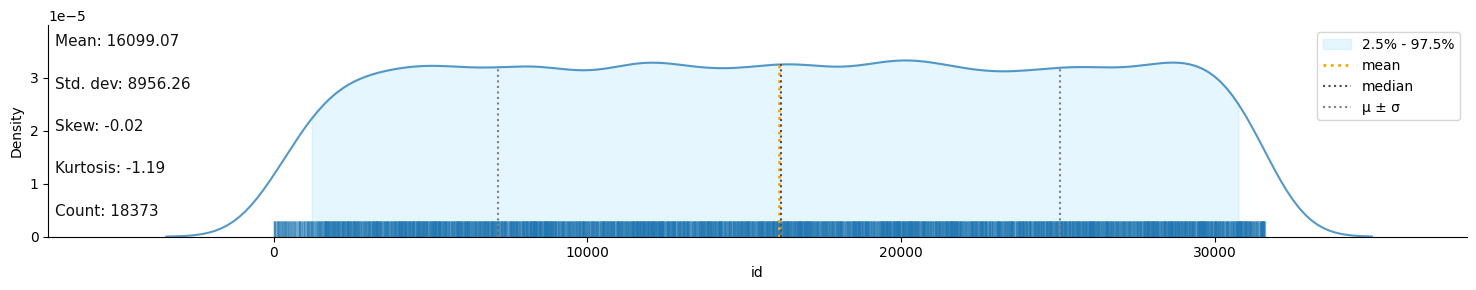

In [36]:
klib.dist_plot(train_dataset)

In [37]:
klib.missingval_plot(train_dataset)

No missing values found in the dataset.


In [38]:
klib.corr_mat(train_dataset)

,id,lte_5g_category,time,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone,slice_type
id,1.00,-0.02,-0.00,0.02,0.01,0.00,-0.00,0.00,-0.00,-0.01,-0.01,-0.01,0.00,0.00,0.01,-0.00,0.00,-0.00
lte_5g_category,-0.02,1.00,-0.01,0.02,-0.02,0.10,-0.10,-0.01,0.01,-0.03,0.02,0.05,0.02,0.02,0.05,0.02,-0.08,0.08
time,-0.00,-0.01,1.00,0.01,-0.01,0.00,-0.00,-0.01,0.01,-0.00,-0.01,0.00,-0.00,0.00,0.01,-0.00,0.00,-0.00
packet_loss_rate,0.02,0.02,0.01,1.00,0.31,0.17,-0.17,-0.02,0.02,-0.17,-0.17,-0.22,0.39,-0.18,0.58,-0.18,-0.07,-0.10
packet_delay,0.01,-0.02,-0.01,0.31,1.00,-0.19,0.19,0.42,-0.42,-0.13,-0.24,-0.28,0.44,-0.25,0.20,-0.24,0.27,-0.39
io_t,0.00,0.10,0.00,0.17,-0.19,1.00,-1.00,-0.12,0.12,-0.32,0.26,0.39,0.27,0.27,0.39,0.26,-0.81,0.91
lte_5g,-0.00,-0.10,-0.00,-0.17,0.19,-1.00,1.00,0.12,-0.12,0.32,-0.26,-0.39,-0.27,-0.27,-0.39,-0.26,0.81,-0.91
gbr,0.00,-0.01,-0.01,-0.02,0.42,-0.12,0.12,1.00,-1.00,0.04,-0.21,0.05,0.28,-0.22,0.04,-0.22,0.10,-0.32
non_gbr,-0.00,0.01,0.01,0.02,-0.42,0.12,-0.12,-1.00,1.00,-0.04,0.21,-0.05,-0.28,0.22,-0.04,0.22,-0.10,0.32
ar_vr_gaming,-0.01,-0.03,-0.00,-0.17,-0.13,-0.32,0.32,0.04,-0.04,1.00,-0.08,-0.12,-0.09,-0.09,-0.13,-0.08,-0.30,-0.29


In [39]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [40]:
# Checking for outliers in the continuous variables
num_train_dataset = train_dataset[['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type']]


In [41]:
train_dataset['slice_type'].value_counts()

1    9839
2    4294
3    4240
Name: slice_type, dtype: int64

In [42]:
train_dataset.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone', 'slice_type'],
      dtype='object')

In [43]:
y_train = train_dataset['slice_type']
x_train = train_dataset.drop('slice_type', axis = 1)
y_test = test_dataset['slice_type']
x_test = test_dataset.drop('slice_type', axis = 1)

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x_train, y_train)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [45]:
import matplotlib.pyplot as plt

In [46]:
feature_importance_normalized

array([1.96047907e-06, 3.22411088e-05, 0.00000000e+00, 7.71850427e-02,
       2.06573178e-01, 2.54515106e-01, 0.00000000e+00, 6.79080438e-02,
       8.53867020e-02, 2.29935701e-02, 4.69127328e-03, 4.45481272e-02,
       5.46713374e-02, 6.93306611e-03, 6.74625612e-02, 1.73966301e-03,
       0.00000000e+00])

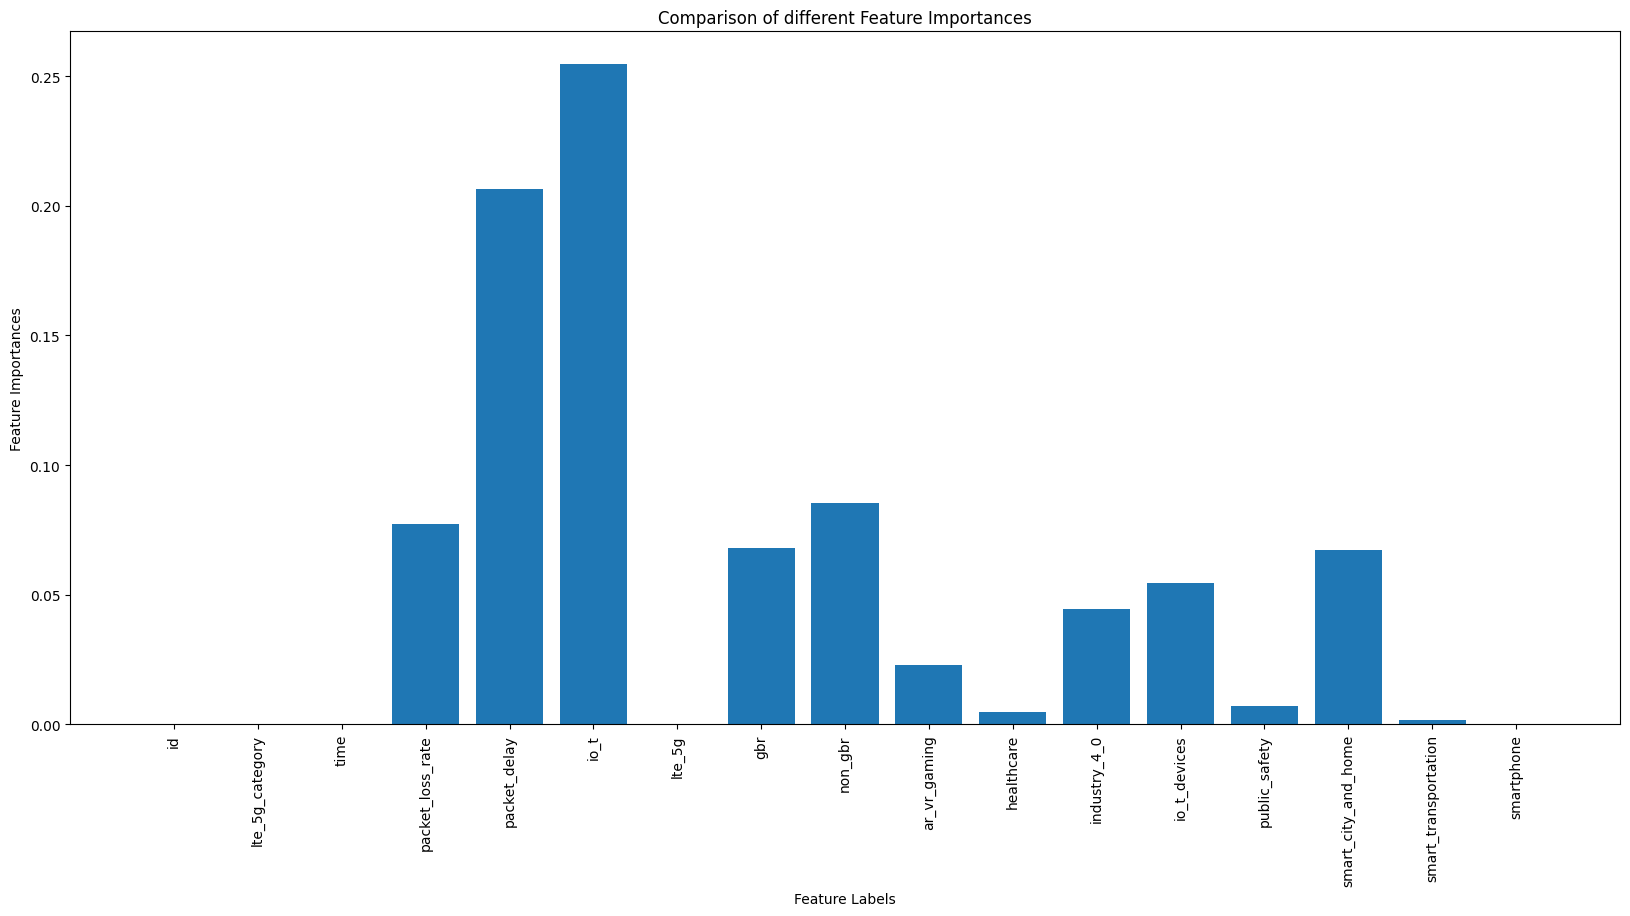

In [47]:
plt.figure(figsize = [20,9])
plt.bar(x_train.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.xticks(rotation = 90)
plt.title('Comparison of different Feature Importances')
plt.show()

In [48]:
x_train.columns

Index(['id', 'lte_5g_category', 'time', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')

In [49]:
x_train2 = x_train[['lte_5g_category', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone']]

In [50]:
x_test2 = x_test[['lte_5g_category', 'packet_loss_rate', 'packet_delay',
       'io_t', 'lte_5g', 'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare',
       'industry_4_0', 'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone']]

In [51]:
print(x_train2.shape, x_test2.shape)

(18373, 15) (31584, 15)


In [52]:
y_train.value_counts()

1    9839
2    4294
3    4240
Name: slice_type, dtype: int64

In [53]:
x_train2 = pd.DataFrame(x_train2)
x_test2 = pd.DataFrame(x_test2)

### Pearson Correlation

In [54]:
x_train2.astype(float).corr()

,lte_5g_category,packet_loss_rate,packet_delay,io_t,lte_5g,gbr,non_gbr,ar_vr_gaming,healthcare,industry_4_0,io_t_devices,public_safety,smart_city_and_home,smart_transportation,smartphone
lte_5g_category,1.000000,0.022254,-0.015085,0.095605,-0.095605,-0.007156,0.007156,-0.034010,0.018408,0.045106,0.019458,0.019485,0.047347,0.019787,-0.075152
packet_loss_rate,0.022254,1.000000,0.306436,0.170858,-0.170858,-0.022315,0.022315,-0.168172,-0.174050,-0.216202,0.389878,-0.182358,0.578743,-0.176111,-0.067416
packet_delay,-0.015085,0.306436,1.000000,-0.187910,0.187910,0.424124,-0.424124,-0.127614,-0.238384,-0.284384,0.437355,-0.249763,0.200818,-0.241206,0.268831
io_t,0.095605,0.170858,-0.187910,1.000000,-1.000000,-0.122402,0.122402,-0.321284,0.260863,0.385515,0.265817,0.273314,0.394585,0.263951,-0.807524
lte_5g,-0.095605,-0.170858,0.187910,-1.000000,1.000000,0.122402,-0.122402,0.321284,-0.260863,-0.385515,-0.265817,-0.273314,-0.394585,-0.263951,0.807524
gbr,-0.007156,-0.022315,0.424124,-0.122402,0.122402,1.000000,-1.000000,0.037476,-0.213782,0.045353,0.281337,-0.223986,0.035940,-0.216313,0.099995
non_gbr,0.007156,0.022315,-0.424124,0.122402,-0.122402,-1.000000,1.000000,-0.037476,0.213782,-0.045353,-0.281337,0.223986,-0.035940,0.216313,-0.099995
ar_vr_gaming,-0.034010,-0.168172,-0.127614,-0.321284,0.321284,0.037476,-0.037476,1.000000,-0.083811,-0.123860,-0.085403,-0.087812,-0.126774,-0.084803,-0.299119
healthcare,0.018408,-0.174050,-0.238384,0.260863,-0.260863,-0.213782,0.213782,-0.083811,1.000000,-0.087228,-0.060145,-0.061841,-0.089280,-0.059722,-0.210653
industry_4_0,0.045106,-0.216202,-0.284384,0.385515,-0.385515,0.045353,-0.045353,-0.123860,-0.087228,1.000000,-0.088885,-0.091391,-0.131942,-0.088261,-0.311313


In [55]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.columns)
    print(dataset.shape)

In [56]:
correlation(x_train2, 0.95)

Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')
(18373, 15)


In [57]:
print(x_test2.columns, x_train2.columns)

Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object') Index(['lte_5g_category', 'packet_loss_rate', 'packet_delay', 'io_t', 'lte_5g',
       'gbr', 'non_gbr', 'ar_vr_gaming', 'healthcare', 'industry_4_0',
       'io_t_devices', 'public_safety', 'smart_city_and_home',
       'smart_transportation', 'smartphone'],
      dtype='object')


In [58]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [59]:
print(y_test.columns, y_train.columns)

Index(['slice_type'], dtype='object') Index(['slice_type'], dtype='object')


### EVAL ML

In [60]:
###!pip install evalml

In [61]:
import evalml

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
lbl= LabelEncoder()

In [66]:
y_test= lbl.fit_transform(y_test)
y_test[:12]

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
y_train= lbl.fit_transform(y_train)
y_train[:12]

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0])

In [68]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [69]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=x_train2, y_train=y_train, problem_type='MULTICLASS')
automl.search()

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.


{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 3.5806334018707275,
  'Total time of batch': 3.7166035175323486},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.3293821811676025,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 2.3987269401550293,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 3.3342366218566895,
  'XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 12.184428930282593,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 9.130321502685547,
  'Total time of batch': 30.656388521194458}}

In [70]:

automl.rankings


,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,4.440892e-16,4.440892e-16,0.000000e+00,100.000000,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,4.440892e-16,4.440892e-16,0.000000e+00,100.000000,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,1.137570e-06,1.137570e-06,2.102637e-11,99.999993,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,1.418487e-04,1.418487e-04,4.158776e-07,99.999153,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,4.380961e-04,4.380961e-04,7.629913e-06,99.997383,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,6,Logistic Regression Classifier w/ Label Encode...,6,5.086381e-04,5.086381e-04,1.026568e-05,99.996962,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Multiclass Classification Pipeline,0,1.674177e+01,1.674177e+01,2.945292e-03,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [71]:
automl.best_pipeline

pipeline = MulticlassClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'RF Classifier Select From Model': ['RF Classifier Select From Model', 'Imputer.x', 'Label Encoder.y'], 'Random Forest Classifier': ['Random Forest Classifier', 'RF Classifier Select From Model.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'RF Classifier Select From Model':{'number_features': None, 'n_estimators': 10, 'max_depth': None, 'percent_features': 0.5, 'threshold': 'median', 'n_jobs': -1}, 'Random Forest Classifier':{'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1}}, random_seed=0)

In [72]:
best_pipeline=automl.best_pipeline

In [73]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*****************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: multiclass


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: multiclass


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:3. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


4. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:4. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for multiclass problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for multiclass problems.


Total training time (including CV): 3.5 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 3.5 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Multiclass  MCC Multiclass  AUC Weighted  AUC Macro  AUC Micro  Precision Weighted  Precision Macro  Precision Micro  F1 Weighted  F1 Macro  F1 Micro  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000                1.000     12,248        6,125
1                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000                1.000     12,249        6,124
2                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000                1.000     12,249        6,124
mean        

INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Multiclass  MCC Multiclass  AUC Weighted  AUC Macro  AUC Micro  Precision Weighted  Precision Macro  Precision Micro  F1 Weighted  F1 Macro  F1 Micro  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000                1.000     12,248        6,125
1                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000                1.000     12,249        6,124
2                          0.000           1.000         1.000      1.000      1.000               1.000            1.000            1.000        1.000     1.000     1.000                         1.000       

In [74]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [75]:
from evalml.objectives import get_optimization_objectives

In [76]:
from evalml.problem_types import ProblemTypes

for objective in get_optimization_objectives(ProblemTypes.MULTICLASS):
    print(objective.name)

MCC Multiclass
Log Loss Multiclass
AUC Weighted
AUC Macro
AUC Micro
Precision Weighted
Precision Macro
Precision Micro
F1 Weighted
F1 Macro
F1 Micro
Balanced Accuracy Multiclass
Accuracy Multiclass


In [78]:
automl_auc = AutoMLSearch(X_train=x_train2, y_train=y_train,
                          problem_type='multiclass',
                          objective='F1 Weighted',
                          additional_objectives=['Balanced Accuracy Multiclass', 'Accuracy Multiclass'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 6.735596418380737,
  'Total time of batch': 6.892743349075317}}

In [79]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,1.000000,1.000000,0.000000,62.647647,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Multiclass Classification Pipeline,0,0.373524,0.373524,0.000094,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [80]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*****************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *


*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*****************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: multiclass


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: multiclass


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:3. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


4. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:4. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for multiclass problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for multiclass problems.


Total training time (including CV): 6.7 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 6.7 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             F1 Weighted  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0                  1.000                         1.000                1.000     12,248        6,125
1                  1.000                         1.000                1.000     12,249        6,124
2                  1.000                         1.000                1.000     12,249        6,124
mean               1.000                         1.000                1.000          -            -
std                0.000                         0.000                0.000          -            -
coef of var        0.000                         0.000                0.000          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             F1 Weighted  Balanced Accuracy Multiclass  Accuracy Multiclass # Training # Validation
0                  1.000                         1.000                1.000     12,248        6,125
1                  1.000                         1.000                1.000     12,249        6,124
2                  1.000                         1.000                1.000     12,249        6,124
mean               1.000                         1.000                1.000          -            -
std                0.000                         0.000                0.000          -            -
coef of var        0.000                         0.000                0.000          -            -


In [81]:
best_pipeline_auc = automl_auc.best_pipeline


In [82]:

# get the score on holdout data
best_pipeline_auc.score(x_test2, y_test,  objectives=["F1 Weighted"])

OrderedDict([('F1 Weighted', 0.6944444444444444)])

In [83]:
best_pipeline.save("network_slicing_pipelines.pkl")

In [85]:
final_model=best_pipeline_auc.load('network_slicing_pipelines.pkl')

In [86]:
final_model.predict_proba(x_test2)

,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
31579,0.0,0.0,1.0
31580,0.0,0.0,1.0
31581,0.0,0.0,1.0
31582,1.0,0.0,0.0


In [87]:
y_pred = final_model.predict(x_test2)

In [88]:
y_pred = pd.DataFrame(y_pred)

In [89]:
y_pred.value_counts()

0    16800
1     7392
2     7392
dtype: int64

In [91]:
y_train = pd.DataFrame(y_train)

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       1.00      0.53      0.69     31584
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.53     31584
   macro avg       0.33      0.18      0.23     31584
weighted avg       1.00      0.53      0.69     31584



Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
